## Create Overlap Plots of Shared Data from different regions/leads

File created 10/7/2025

In [1]:
#relevant import statements
import numpy as np
import math
import pandas as pd
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt

##just to stop the excess number of warnings 
import warnings
warnings.filterwarnings('ignore')

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from geopy.distance import great_circle
import cartopy.crs as ccrs
from matplotlib.path import Path

In [2]:
##import files to make the plots
from Modified_PredictionPlots import extrapolate
from Modified_PredictionPlots import daily_anomaly

from Modified_PredictionPlots import preprocess_ellipse
from Modified_PredictionPlots import CScheckevent_label

from Modified_PredictionPlots import combine_cross

In [3]:
##set up input file 
shift = 20
idx = 129 #129 for 20, 119 for 30.

In [4]:
##for horizontal cross sections of GPH
infile = open("../../data/gph/1959composite_capGPH10.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
GPH = gph_input[52:62, 19+shift:168, :, :].reshape((10, idx, 26, 180)) 
GPH = extrapolate(GPH)
infile.close()

infile = open("../../data/gph/1959anom_capGPH10.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
GPHA = gph_input[52:62, 19+shift:168, :, :].reshape((10, idx, 26, 180))
GPHA = extrapolate(GPHA)
infile.close()

print("GPH shape: ",GPH.shape)

GPH shape:  (10, 129, 26, 181)


In [5]:
#for vertical cross sections of GPH
infile = open("../../data/gph/1959_gphforNAO.p","rb")
gph_input = pickle.load(infile)  ##GPH vertical cross section along longitudes
gph_input = np.delete(gph_input,[151],1)
vert_GPH= gph_input[52:62, 19+shift:168, :, :].reshape((10, idx, 37, 180)) 
infile.close()

print("Vertical GPH shape: ",vert_GPH.shape)

Vertical GPH shape:  (10, 129, 37, 180)


In [6]:
infile = open("../../data/NH_tempanoms_Nov90-40.p","rb",)
temp_input = pickle.load(infile)  ##ZMehf vertical cross section along longitudes
TEMP = temp_input[52:62, shift:, :, :].reshape((10, idx, 26, 180))
TEMP = extrapolate(TEMP)
infile.close()

In [7]:
##open indice files
infile = open("./shared/sharedPOS20.p", 'rb') 
posXtest = pickle.load(infile)
infile.close()

infile = open("./shared/sharedFPOS20.p", 'rb') 
FposXtest = pickle.load(infile)
infile.close()

infile = open("./shared/sharedNEG20.p", 'rb') 
negXtest = pickle.load(infile)
infile.close()

infile = open("./shared/sharedFNEG20.p", 'rb') 
FnegXtest = pickle.load(infile)
infile.close()

### Plot!

In [8]:
##GPH Cross Section
#horizontal
GPH_cpos = np.mean(CScheckevent_label(posXtest,GPH,idx),axis =0)
GPH_cneg = np.mean(CScheckevent_label(negXtest,GPH,idx),axis =0)
GPH_Fpos = np.mean(CScheckevent_label(FposXtest,GPH,idx),axis =0)
GPH_Fneg = np.mean(CScheckevent_label(FnegXtest,GPH,idx),axis =0)
GPHA_cpos = np.mean(CScheckevent_label(posXtest,GPHA,idx),axis =0)
GPHA_cneg = np.mean(CScheckevent_label(negXtest,GPHA,idx),axis =0)
GPHA_Fpos = np.mean(CScheckevent_label(FposXtest,GPHA,idx),axis =0)
GPHA_Fneg = np.mean(CScheckevent_label(FnegXtest,GPHA,idx),axis =0)

In [9]:
#vertical
vert_GPH_cpos = np.mean(CScheckevent_label(posXtest,vert_GPH,idx),axis =0)
vert_GPH_cneg = np.mean(CScheckevent_label(negXtest,vert_GPH,idx),axis =0)
vert_GPH_Fpos = np.mean(CScheckevent_label(FposXtest,vert_GPH,idx),axis =0)
vert_GPH_Fneg = np.mean(CScheckevent_label(FnegXtest,vert_GPH,idx),axis =0)

In [10]:
##Temp Cross Section
TEMP_cpos = np.mean(CScheckevent_label(posXtest,TEMP,idx),axis =0)
TEMP_cneg = np.mean(CScheckevent_label(negXtest,TEMP,idx),axis =0)
TEMP_Fpos = np.mean(CScheckevent_label(FposXtest,TEMP,idx),axis =0)
TEMP_Fneg = np.mean(CScheckevent_label(FnegXtest,TEMP,idx),axis =0)

In [11]:
colorbarMin1 = -900
colorbarMax1 = 900
colorspace1 = 50

colorbarMin2 = -200
colorbarMax2 = 200
colorspace2 = 25

colorbarMin3 = -10
colorbarMax3 = 10
colorspace3 = 1

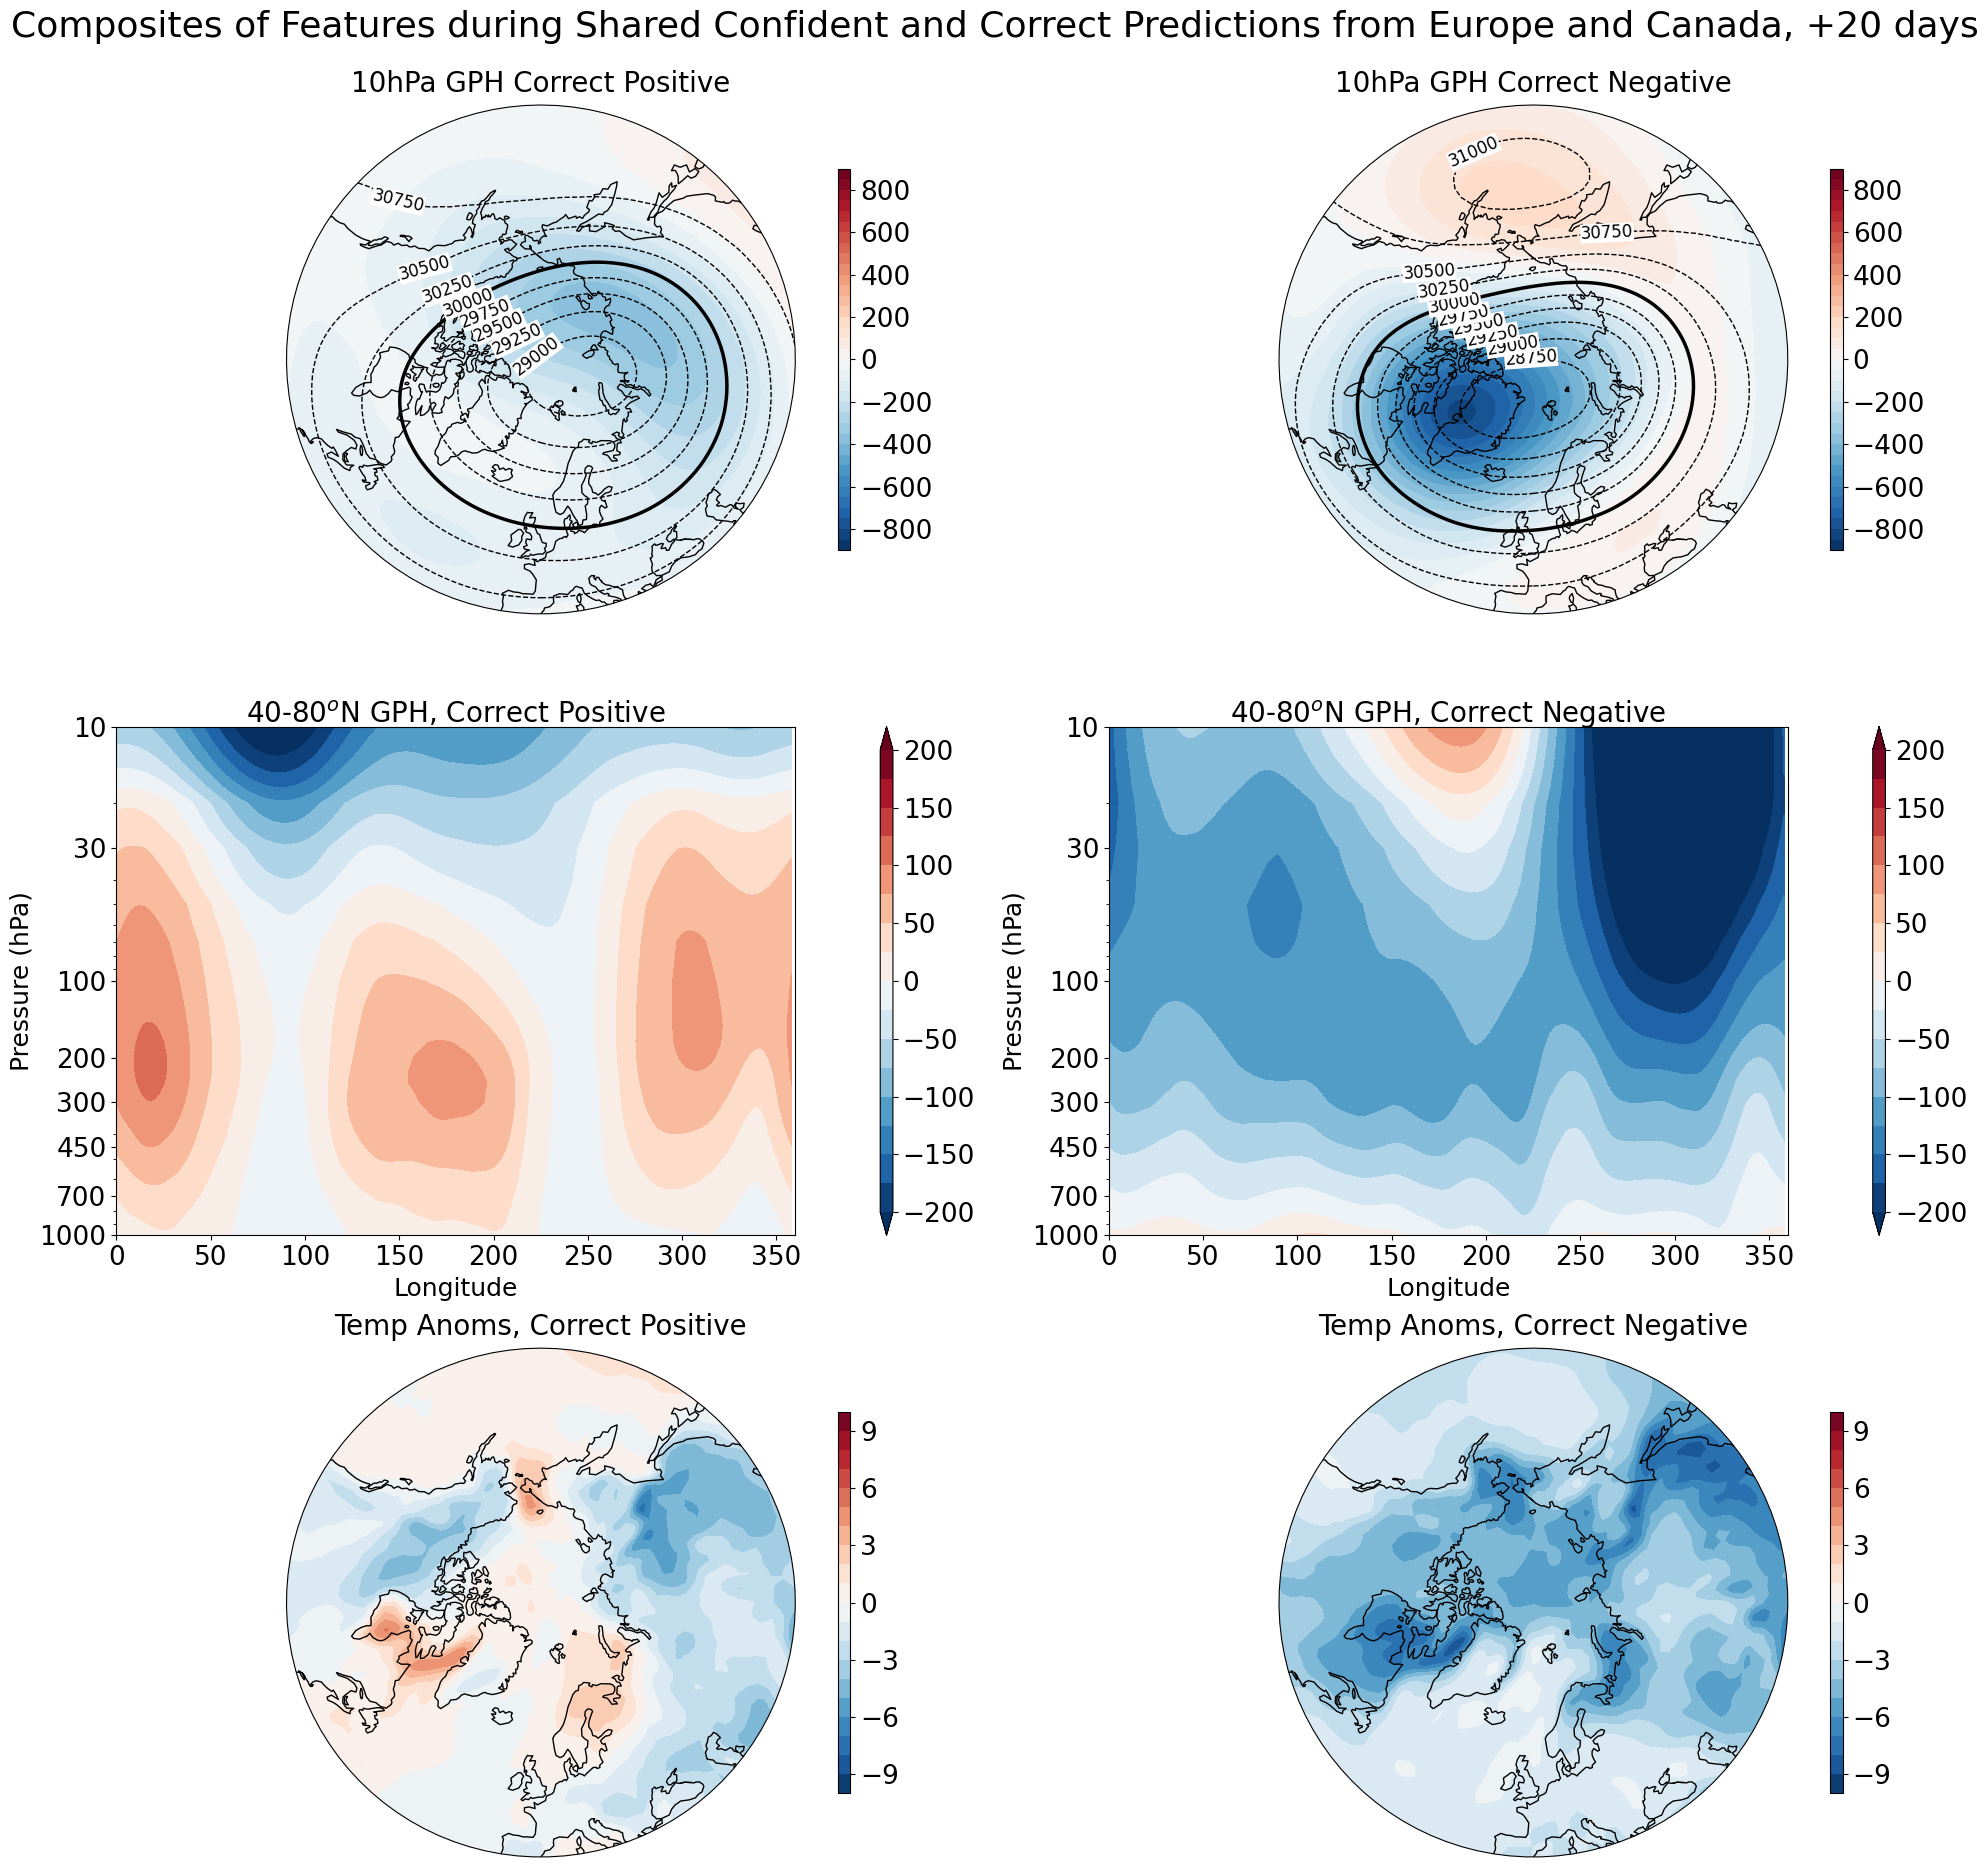

In [12]:
combine_cross(GPH_cpos,GPH_cneg,vert_GPH_cpos,vert_GPH_cneg,TEMP_cpos,TEMP_cneg,
              GPHA_cpos,GPHA_cneg, colorbarMin1, colorbarMax1, colorspace1,
              colorbarMin2, colorbarMax2, colorspace2, colorbarMin3, colorbarMax3,
              colorspace3,"+20 days", "compar20_plots.png")